<a href="https://colab.research.google.com/github/rohithpraba/E-commerce-Customer-Segmentation-Prediction/blob/main/E_commerce_Customer_Segmentation_and_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install ydata-profiling

In [15]:
!pip install xgboost

In [16]:
!pip install plotly
!pip install eli5

In [17]:
!pip install imblearn
!pip install shap
!pip install gradio

# REQUIRED LIBRARIES

In [18]:
  import pandas as pd  # for data manipulation
  from ydata_profiling import ProfileReport # initial eda report about the data
  from datetime import datetime
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np  # for numerical computing

  # for data visualization
  import matplotlib.pyplot as plt
  import seaborn as sns

  from sklearn.preprocessing import StandardScaler # Scaling the data
  from sklearn.pipeline import Pipeline  # Creating a pipeline

  # Clustering algorithms
  from sklearn.cluster import KMeans
  from sklearn.cluster import AgglomerativeClustering
  from sklearn.cluster import DBSCAN

  # Internal metrics for unsupervised learning
  import scipy.cluster.hierarchy as shc
  from scipy.cluster.hierarchy import dendrogram, linkage
  from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

  # Dimensionality Reduction techniques
  from sklearn.decomposition import PCA
  from sklearn.manifold import TSNE

  # Encoding
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder

  from sklearn.model_selection import train_test_split  # splitting the training and testing data
  from imblearn.over_sampling import SMOTE  # to handle class imbalances
  from imblearn.combine import SMOTETomek   # to handle class imbalances and removes noisy overlapping samples

  # Models used
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier
  from xgboost import XGBClassifier
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier

  # Hyperparameter tuning techniques
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import StratifiedKFold

  # Metrics for supervised learning
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import classification_report
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import matthews_corrcoef

  #Statistical testing
  from scipy.stats import zscore

  # Explainability model
  import shap
  import eli5
  from eli5.sklearn import PermutationImportance

  # Deployment
  import gradio as gr
  import joblib

In [19]:
df = pd.read_csv('/content/drive/MyDrive/E-Commerce Customer Segmentation & Prediction_Capstone/data.csv', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [20]:
#df1 = pd.read_csv('/content/drive/MyDrive/E-Commerce Customer Segmentation & Prediction_Capstone/data.csv', encoding='latin1')

# PROFILE REPORT/ EXPLORATORY DATA ANALYSIS


In [21]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:33<00:00,  4.22s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA CLEANING

# DROPPING DUPLICATE ROWS


In [22]:
df.drop_duplicates(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# DROPPING MISSING VALUES IN CUSTOMER ID

In [23]:
df.dropna(subset=['CustomerID'],inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# DROPPED ROWS OF UNITPRICE <=0

In [24]:
df=df[df['UnitPrice'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [25]:
print(df['Country'].unique())
country_list = sorted(df['Country'].unique().tolist())
print(country_list)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']


# SEGMENTATION - UK & NON-UK

In [26]:
df['CountryGroup'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non-UK')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,UK
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Non-UK
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Non-UK
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Non-UK
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Non-UK


In [27]:
df = df[df['Quantity'] > 0]   #NO RETURNS,DEFICIT,NEGATIVE VALUES
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,UK
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,UK
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Non-UK
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Non-UK
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Non-UK
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Non-UK


# DTYPE

In [28]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Non-UK
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Non-UK
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK


# SPLITTING THE COUNTRYGROUP ATTRIBUTES

In [29]:
uk_df = df[df['CountryGroup'] == 'UK'].copy()
uk_df
non_uk_df = df[df['CountryGroup'] == 'Non-UK'].copy()
non_uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryGroup
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,Non-UK
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,Non-UK
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,Non-UK
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,Non-UK
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,Non-UK
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Non-UK
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Non-UK
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK


# OUTLIERS DETECTION


In [30]:
def outlier_treatment(df_in, column):
    Q1, Q3 = np.percentile(df_in[column], [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

#CLIPPING OF OUTLIERS

In [31]:
# for uk quantity
low_q_uk, high_q_uk = outlier_treatment(uk_df, 'Quantity')
uk_df['Quantity'] = uk_df['Quantity'].clip(lower=low_q_uk, upper=high_q_uk)

# for uk unitprice
low_p_uk, high_p_uk = outlier_treatment(uk_df, 'UnitPrice')
uk_df['UnitPrice'] = uk_df['UnitPrice'].clip(lower=low_p_uk, upper=high_p_uk)

# for non_uk quantity
low_q_nonuk, high_q_nonuk = outlier_treatment(non_uk_df, 'Quantity')
non_uk_df['Quantity'] = non_uk_df['Quantity'].clip(lower=low_q_nonuk, upper=high_q_nonuk)

# for non_uk unitprice
low_p_nonuk, high_p_nonuk = outlier_treatment(non_uk_df, 'UnitPrice')
non_uk_df['UnitPrice'] = non_uk_df['UnitPrice'].clip(lower=low_p_nonuk, upper=high_p_nonuk)

# SKEWNESS CHECK

In [32]:
print(uk_df['Quantity'].skew())
print(uk_df['UnitPrice'].skew())
print(non_uk_df['Quantity'].skew())
print(non_uk_df['UnitPrice'].skew())

1.2498730226360768
1.1694619032868059
1.039606604458755
1.0446277773599575


# UNSUPERVISED LEARNING - CLUSTERING

#RFM TABLE CREATION

In [33]:
# recency for uk data
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])
reference_date_uk = pd.to_datetime(uk_df['InvoiceDate'].max())

rfm_r = uk_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm_r['Recency'] = (reference_date_uk - rfm_r['InvoiceDate']).dt.days
rfm_r.drop(columns='InvoiceDate', inplace=True)

# recency for non_uk data
non_uk_df['InvoiceDate'] = pd.to_datetime(non_uk_df['InvoiceDate'])
reference_date_nonuk = pd.to_datetime(non_uk_df['InvoiceDate'].max())

rfm_r1 = non_uk_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm_r1['Recency'] = (reference_date_nonuk - rfm_r1['InvoiceDate']).dt.days
rfm_r1.drop(columns='InvoiceDate', inplace=True)

# frequency for uk data
uk_df['InvoiceNo'] = uk_df['InvoiceNo'].astype(str)
uk_df = uk_df[~uk_df['InvoiceNo'].str.startswith('C')]  #removed cancelled orders
uk_df = uk_df[uk_df['Quantity'] > 0]                    #valid quantities
rfm_f = uk_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
rfm_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# frequency for non_uk data
non_uk_df['InvoiceNo'] = non_uk_df['InvoiceNo'].astype(str)
non_uk_df = non_uk_df[~non_uk_df['InvoiceNo'].str.startswith('C')]
non_uk_df = non_uk_df[non_uk_df['Quantity'] > 0]
rfm_f1 = non_uk_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
rfm_f1.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# monetary value for uk data
uk_df['TotalPrice'] = uk_df['Quantity'] * uk_df['UnitPrice']
rfm_m = uk_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_m.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# monetary value for non_uk data
non_uk_df['TotalPrice'] = non_uk_df['Quantity'] * non_uk_df['UnitPrice']
rfm_m1 = non_uk_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_m1.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)


#MERGING RFM TABLES

In [34]:
# merge recency,frequency,monetary for uk
rfm_uk = pd.merge(rfm_r, rfm_f, on='CustomerID', how='inner')
rfm_uk = pd.merge(rfm_uk, rfm_m, on='CustomerID', how='inner')

# merge recency,frequency,monetary for non_uk
rfm_nonuk = pd.merge(rfm_r1, rfm_f1, on='CustomerID', how='inner')
rfm_nonuk = pd.merge(rfm_nonuk, rfm_m1, on='CustomerID', how='inner')


In [35]:
rfm_uk.info()
rfm_nonuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   float64
 1   Recency     3920 non-null   int64  
 2   Frequency   3920 non-null   int64  
 3   Monetary    3920 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 122.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  418 non-null    float64
 1   Recency     418 non-null    int64  
 2   Frequency   418 non-null    int64  
 3   Monetary    418 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


# FEATURE SCALING

In [36]:
# standardscaler
scaler = StandardScaler()
scaler.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
rfm_uk[['Recency', 'Frequency', 'Monetary']] = scaler.transform(rfm_uk[['Recency', 'Frequency', 'Monetary']])

scaler.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
rfm_nonuk[['Recency', 'Frequency', 'Monetary']] = scaler.transform(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])

# DETERMINE K VALUE

[11760.000000000025]
[11760.000000000025, 8080.596971832493]
[11760.000000000025, 8080.596971832493, 4859.999450483695]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766, 2233.8408858792905]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766, 2233.8408858792905, 1841.6989905043322]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766, 2233.8408858792905, 1841.6989905043322, 1516.7686244376844]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766, 2233.8408858792905, 1841.6989905043322, 1516.7686244376844, 1348.1916391718617]
[11760.000000000025, 8080.596971832493, 4859.999450483695, 3237.2462392091306, 2653.7397845465766, 2233.84

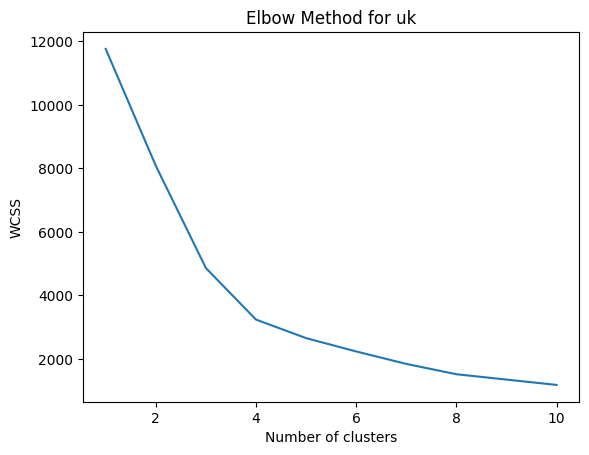

[1254.0000000000002]
[1254.0000000000002, 655.6258783556617]
[1254.0000000000002, 655.6258783556617, 310.031699419754]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474, 111.97840863081808]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474, 111.97840863081808, 76.73413091376115]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474, 111.97840863081808, 76.73413091376115, 60.36328183963145]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474, 111.97840863081808, 76.73413091376115, 60.36328183963145, 48.47728142778982]
[1254.0000000000002, 655.6258783556617, 310.031699419754, 200.16375746085114, 150.56458218369474, 111.97840863081808, 7

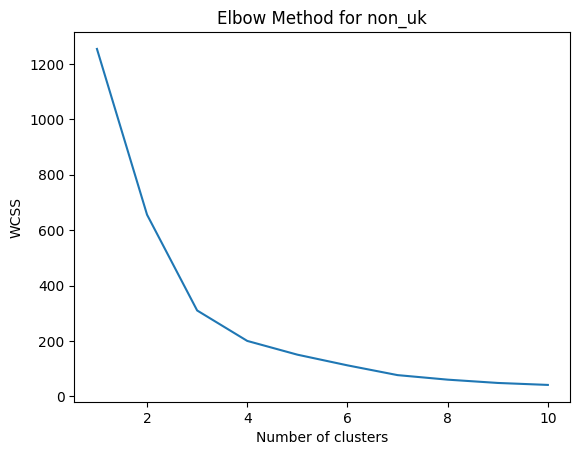

In [37]:
# elbow method for uk
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
    wcss.append(kmeans.inertia_)
    print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for uk')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# elbow method for non_uk
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
    wcss.append(kmeans.inertia_)
    print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for non_uk')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# KMEANS CLUSTERING

In [38]:
# kmeans clustering for uk
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
rfm_uk['Cluster'] = kmeans.labels_

# kmeans clustering for non_uk
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
rfm_nonuk['Cluster'] = kmeans.labels_

# KMEANS CLUSTER PROFILING

In [39]:
# average of rfm_uk
rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()        # for the summary of customer behaviour within each cluster average

,Recency,Frequency,Monetary
Cluster,,,
0,1.548685,-0.373821,-0.343129
1,-0.479158,-0.118469,-0.125256
2,-0.782355,1.805251,1.692019
3,-0.861472,8.834838,9.890717


In [40]:
# average of rfm_non_uk
rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()      # for the summary of customer behaviour within each cluster average

,Recency,Frequency,Monetary
Cluster,,,
0,-0.480306,-0.012065,-0.050419
1,1.670281,-0.270016,-0.217279
2,-0.906204,17.309048,13.171266
3,-0.800800,3.977774,7.795718


# KMEANS LABELING BY CLUSTERS

In [41]:
# labeling for uk
kmeans_labels_uk = {
    0: 'Churning Customers',
    1: 'New or One-time Shoppers',
    2: 'Potential Loyalists',
    3: 'Loyal High Spenders',
}

#labeling for non_uk
kmeans_labels_nonuk = {
    0: 'New or One-time Shoppers',
    1: 'Churning Customers',
    2: 'Loyal High Spenders',
    3: 'Potential Loyalists',
}

# ADDING COLUMN TO RFM

In [42]:
# Adding new column to rfm_uk_df
rfm_uk['Customer_Segment'] = rfm_uk['Cluster'].map(kmeans_labels_uk)

# Adding new column to rfm_nonuk_df
rfm_nonuk['Customer_Segment'] = rfm_nonuk['Cluster'].map(kmeans_labels_nonuk)

# KMEANS LABELING LOGIC

In [43]:
# Label logic for uk
cluster_summary_uk = rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Label assigning for uk
def assign_label_uk(row):
    if row['Recency'] < -0.85 and row['Frequency'] > 8 and row['Monetary'] > 9:
        return 'Loyal High Spenders'      # Cluster 3
    elif row['Recency'] < -0.75 and row['Frequency'] > 1.5 and row['Monetary'] > 1.5:
        return 'Potential Loyalists'      # Cluster 2
    elif row['Recency'] > 1.5:
        return 'Churning Customers'       # Cluster 0
    else:
        return 'New or One-time Shoppers' # Cluster 1

# Apply labeling
cluster_summary_uk['Label'] = cluster_summary_uk.apply(assign_label_uk, axis=1)

# Mapping and assigning to rfm_uk
kmeans_mapping_uk = dict(zip(cluster_summary_uk['Cluster'], cluster_summary_uk['Label']))
rfm_uk['Segment_KMeans'] = rfm_uk['Cluster'].map(kmeans_mapping_uk)

In [44]:
# Label logic for non_uk
cluster_summary_nonuk = rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Label assigning for non_uk
def assign_label_nonuk(row):
    if row['Recency'] < -0.9 and row['Frequency'] > 15 and row['Monetary'] > 12:
        return 'Loyal High Spenders'      # Cluster 2
    elif row['Recency'] < -0.8 and row['Frequency'] > 3 and row['Monetary'] > 7:
        return 'Potential Loyalists'      # Cluster 3
    elif row['Recency'] > 1.5:
        return 'Churning Customers'       # Cluster 1
    else:
        return 'New or One-time Shoppers' # Cluster 0

# Apply labeling
cluster_summary_nonuk['Label'] = cluster_summary_nonuk.apply(assign_label_nonuk, axis=1)

# Mapping and assigning to rfm_nonuk
kmeans_mapping_nonuk = dict(zip(cluster_summary_nonuk['Cluster'], cluster_summary_nonuk['Label']))
rfm_nonuk['Segment_KMeans'] = rfm_nonuk['Cluster'].map(kmeans_mapping_nonuk)

# KMEANS CLUSTER PROFILING AFTER LABELING

In [45]:
# Kmeans clustering after labeling for uk
kmeans_labeled_uk = rfm_uk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_KMeans']]
kmeans_labeled_uk.sort_values(by='Segment_KMeans').head()  # for seeing the number of rows


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment_KMeans
0,12346.0,2.349165,-0.451,-0.467827,0,Churning Customers
1732,15257.0,1.917096,-0.451,-0.435026,0,Churning Customers
1731,15256.0,0.570648,-0.451,-0.441332,0,Churning Customers
3239,17349.0,0.872092,-0.451,-0.450915,0,Churning Customers
2519,16344.0,0.661081,-0.451,-0.440335,0,Churning Customers


In [46]:
# Kmeans clustering after labeling for non_uk
kmeans_labeled_nonuk = rfm_nonuk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_KMeans']]
kmeans_labeled_nonuk.sort_values(by='Segment_KMeans').tail()    # for seeing the number of rows


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment_KMeans
144,12527.0,-0.130047,-0.133192,-0.248695,0,New or One-time Shoppers
152,12538.0,-0.637903,-0.309376,-0.247028,0,New or One-time Shoppers
387,14156.0,-0.819964,4.447598,6.147001,3,Potential Loyalists
54,12415.0,-0.685814,1.452466,5.055773,3,Potential Loyalists
394,14646.0,-0.896621,6.033257,12.184380,3,Potential Loyalists


In [47]:
# Get mean RFM values for each cluster
print("UK Cluster Profiles:")
print(rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())

print("\nNon-UK Cluster Profiles:")
print(rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


UK Cluster Profiles:
          Recency  Frequency  Monetary
Cluster                               
0        1.548685  -0.373821 -0.343129
1       -0.479158  -0.118469 -0.125256
2       -0.782355   1.805251  1.692019
3       -0.861472   8.834838  9.890717

Non-UK Cluster Profiles:
          Recency  Frequency   Monetary
Cluster                                
0       -0.480306  -0.012065  -0.050419
1        1.670281  -0.270016  -0.217279
2       -0.906204  17.309048  13.171266
3       -0.800800   3.977774   7.795718


# ALTERNATIVE TECHNIQUES FOR CLUSTERING

In [48]:
# Preparing uk data for dendrogram
'''
linked = linkage(rfm_uk[['Recency', 'Frequency', 'Monetary']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for uk')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Preparing non_uk data for dendrogram
linked = linkage(rfm_nonuk[['Recency', 'Frequency', 'Monetary']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for non_uk')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()'''


"\nlinked = linkage(rfm_uk[['Recency', 'Frequency', 'Monetary']], method='ward')\nplt.figure(figsize=(10, 7))\ndendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)\nplt.title('Dendrogram for uk')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean distances')\nplt.show()\n\n# Preparing non_uk data for dendrogram\nlinked = linkage(rfm_nonuk[['Recency', 'Frequency', 'Monetary']], method='ward')\nplt.figure(figsize=(10, 7))\ndendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)\nplt.title('Dendrogram for non_uk')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean distances')\nplt.show()"

# USING AGGLOMERATIVE CLUSTERING

In [49]:
'''
# Agglomerative clustering for uk data
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
rfm_uk['Cluster'] = agg_clustering.fit_predict(rfm_uk[['Recency', 'Frequency', 'Monetary']])
'''

"\n# Agglomerative clustering for uk data\nn_clusters = 4\nagg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')\nrfm_uk['Cluster'] = agg_clustering.fit_predict(rfm_uk[['Recency', 'Frequency', 'Monetary']])\n"

In [50]:
'''
# Agglomerative clustering for non_uk data
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
rfm_nonuk['Cluster'] = agg_clustering.fit_predict(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
'''

"\n# Agglomerative clustering for non_uk data\nn_clusters = 4\nagg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')\nrfm_nonuk['Cluster'] = agg_clustering.fit_predict(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])\n"

# AGGLOMERATIVE CLUSTER PROFILING

In [51]:
'''
# average of rfm_uk
rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
'''

"\n# average of rfm_uk\nrfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()\n"

In [52]:
'''
# average of rfm_non_uk
rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
'''

"\n# average of rfm_non_uk\nrfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()\n"

# AGGLOMERATIVE LABELING LOGIC

In [53]:
'''
# Labeling logic for uk
agg_cluster_summary_uk = rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Assigning labels
def assign_label_uk(row):
    if row['Recency'] < -0.8 and row['Frequency'] > 8 and row['Monetary'] > 9:
        return 'Loyal High Spenders'  # Cluster 0
    elif row['Recency'] < -0.7 and row['Frequency'] > 1.5 and row['Monetary'] > 1.5:
        return 'Potential Loyalists'  # Cluster 1
    elif row['Recency'] > 1.5:
        return 'Churning Customers'  # Cluster 3
    else:
        return 'New or One-time Shoppers'  # Cluster 2

# Apply labeling
agg_cluster_summary_uk['Label'] = agg_cluster_summary_uk.apply(assign_agg_label_uk, axis=1)

# Creating and mapping
agg_label_mapping_uk = dict(zip(agg_cluster_summary_uk['Cluster'], agg_cluster_summary_uk['Label']))
rfm_uk['Segment_Agglomerative'] = rfm_uk['Cluster'].map(agg_label_mapping_uk)
'''

"\n# Labeling logic for uk\nagg_cluster_summary_uk = rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()\n\n# Assigning labels\ndef assign_label_uk(row):\n    if row['Recency'] < -0.8 and row['Frequency'] > 8 and row['Monetary'] > 9:\n        return 'Loyal High Spenders'  # Cluster 0\n    elif row['Recency'] < -0.7 and row['Frequency'] > 1.5 and row['Monetary'] > 1.5:\n        return 'Potential Loyalists'  # Cluster 1\n    elif row['Recency'] > 1.5:\n        return 'Churning Customers'  # Cluster 3\n    else:\n        return 'New or One-time Shoppers'  # Cluster 2\n\n# Apply labeling\nagg_cluster_summary_uk['Label'] = agg_cluster_summary_uk.apply(assign_agg_label_uk, axis=1)\n\n# Creating and mapping\nagg_label_mapping_uk = dict(zip(agg_cluster_summary_uk['Cluster'], agg_cluster_summary_uk['Label']))\nrfm_uk['Segment_Agglomerative'] = rfm_uk['Cluster'].map(agg_label_mapping_uk)\n"

In [54]:
'''
# Labeling logic for non_uk
agg_cluster_summary_nonuk = rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

def assign_label_nonuk(row):
    if row['Recency'] < -0.9 and row['Frequency'] > 15 and row['Monetary'] > 12:
        return 'Loyal High Spenders'  # Cluster 0
    elif row['Recency'] < -0.8 and row['Frequency'] > 3 and row['Monetary'] > 7:
        return 'Potential Loyalists'  # Cluster 1
    elif row['Recency'] > 1.5:
        return 'Churning Customers'  # Cluster 3
    else:
        return 'New or One-time Shoppers'  # Cluster 2

# Apply labeling
agg_cluster_summary_nonuk['Label'] = agg_cluster_summary_nonuk.apply(assign_agg_label_nonuk, axis=1)

# Creating and mapping
agg_label_mapping_nonuk = dict(zip(agg_cluster_summary_nonuk['Cluster'], agg_cluster_summary_nonuk['Label']))
rfm_nonuk['Segment_Agglomerative'] = rfm_nonuk['Cluster'].map(agg_label_mapping_nonuk)
'''

"\n# Labeling logic for non_uk\nagg_cluster_summary_nonuk = rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()\n\ndef assign_label_nonuk(row):\n    if row['Recency'] < -0.9 and row['Frequency'] > 15 and row['Monetary'] > 12:\n        return 'Loyal High Spenders'  # Cluster 0\n    elif row['Recency'] < -0.8 and row['Frequency'] > 3 and row['Monetary'] > 7:\n        return 'Potential Loyalists'  # Cluster 1\n    elif row['Recency'] > 1.5:\n        return 'Churning Customers'  # Cluster 3\n    else:\n        return 'New or One-time Shoppers'  # Cluster 2\n\n# Apply labeling\nagg_cluster_summary_nonuk['Label'] = agg_cluster_summary_nonuk.apply(assign_agg_label_nonuk, axis=1)\n\n# Creating and mapping\nagg_label_mapping_nonuk = dict(zip(agg_cluster_summary_nonuk['Cluster'], agg_cluster_summary_nonuk['Label']))\nrfm_nonuk['Segment_Agglomerative'] = rfm_nonuk['Cluster'].map(agg_label_mapping_nonuk)\n"

# AGGLOMERATIVE CLUSTER PROFILING AFTER LABELING

In [55]:
'''
# Agglomerative cluster profiling after labeling for uk
agg_labeled_uk = rfm_uk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Agglomerative']]
agg_labeled_uk.sort_values(by='Segment_Agglomerative').head()
'''

"\n# Agglomerative cluster profiling after labeling for uk\nagg_labeled_uk = rfm_uk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Agglomerative']]\nagg_labeled_uk.sort_values(by='Segment_Agglomerative').head()\n"

In [56]:
'''
# Agglomerative cluster profiling after labeling for non_uk
agg_labeled_nonuk = rfm_nonuk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Agglomerative']]
agg_labeled_nonuk.sort_values(by='Segment_Agglomerative').tail()
'''

"\n# Agglomerative cluster profiling after labeling for non_uk\nagg_labeled_nonuk = rfm_nonuk[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Agglomerative']]\nagg_labeled_nonuk.sort_values(by='Segment_Agglomerative').tail()\n"

# USING DBSCAN CLUSTERING

In [57]:
'''
# Dbscan technique for uk
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
rfm_uk['Cluster'] = dbscan.fit_predict(rfm_uk[['Recency', 'Frequency', 'Monetary']])

# Dbscan technique for non_uk
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
rfm_nonuk['Cluster'] = dbscan.fit_predict(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])'''


"\n# Dbscan technique for uk\ndbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')\nrfm_uk['Cluster'] = dbscan.fit_predict(rfm_uk[['Recency', 'Frequency', 'Monetary']])\n\n# Dbscan technique for non_uk\ndbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')\nrfm_nonuk['Cluster'] = dbscan.fit_predict(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])"

# DBSCAN CLUSTER PROFILING

In [58]:
'''
# Average of rfm_uk
dbscan_summary_uk = rfm_uk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nDBSCAN UK Cluster Summary:\n", dbscan_summary_uk)'''


'\n# Average of rfm_uk\ndbscan_summary_uk = rfm_uk.groupby(\'Cluster\')[[\'Recency\', \'Frequency\', \'Monetary\']].mean()\nprint("\nDBSCAN UK Cluster Summary:\n", dbscan_summary_uk)'

In [59]:
'''
# Average of rfm_non_uk
dbscan_summary_nonuk = rfm_nonuk.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nDBSCAN Non-UK Cluster Summary:\n", dbscan_summary_nonuk)
'''

'\n# Average of rfm_non_uk\ndbscan_summary_nonuk = rfm_nonuk.groupby(\'Cluster\')[[\'Recency\', \'Frequency\', \'Monetary\']].mean()\nprint("\nDBSCAN Non-UK Cluster Summary:\n", dbscan_summary_nonuk)\n'

# INTERNAL EVALUATION METRICS

# SILHOUETTE SCORE

[np.float64(0.772540430765961)]
[np.float64(0.772540430765961), np.float64(0.555026388789544)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368), np.float64(0.5250852411251974)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368), np.float64(0.5250852411251974), np.float64(0.5256816068267911)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368), np.float64(0.5250852411251974), np.float64(0.5256816068267911), np.float64(0.4836902767079144)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368), np.float64(0.5250852411251974), np.float64(0.5256816068267911), np.float64(0.4836902767079144), np.float64(0.4729378897886001)]
[np.float64(0.772540430765961), np.float64(0.555026388789544), np.float64(0.5826074340509368), np.float64(0.52

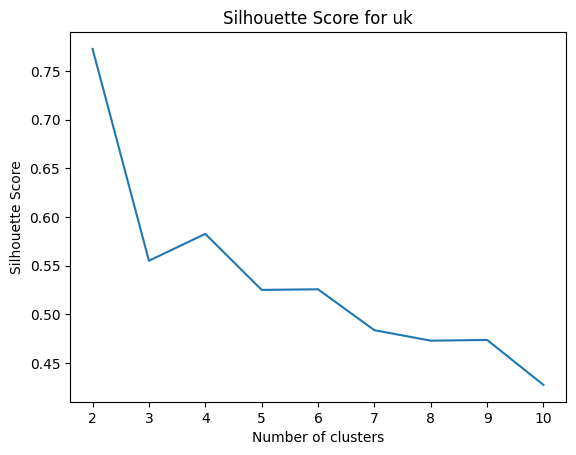

[np.float64(0.9229269337418348)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285), np.float64(0.4956271277636903)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285), np.float64(0.4956271277636903), np.float64(0.4930898399693051)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285), np.float64(0.4956271277636903), np.float64(0.4930898399693051), np.float64(0.493405366667406)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285), np.float64(0.4956271277636903), np.float64(0.4930898399693051), np.float64(0.493405366667406), np.float64(0.43850071270601215)]
[np.float64(0.9229269337418348), np.float64(0.6403700439126156), np.float64(0.6482734081792285), n

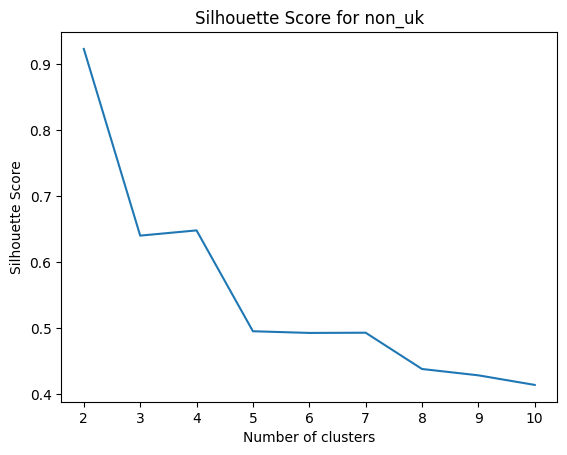

In [60]:
# Silhouette Score for kmeans uk
kmeans_sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
    kmeans_sil.append(silhouette_score(rfm_uk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_sil)
plt.plot(range(2, 11), kmeans_sil)
plt.title('Silhouette Score for uk')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Silhouette score for kmeans non_uk
kmeans_sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
    kmeans_sil.append(silhouette_score(rfm_nonuk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_sil)
plt.plot(range(2, 11), kmeans_sil)
plt.title('Silhouette Score for non_uk')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


[np.float64(0.7530925963265344)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714), np.float64(0.7316180563615358)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714), np.float64(0.7316180563615358), np.float64(0.7162763860558741)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714), np.float64(0.7316180563615358), np.float64(0.7162763860558741), np.float64(0.7041706147305843)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714), np.float64(0.7316180563615358), np.float64(0.7162763860558741), np.float64(0.7041706147305843), np.float64(0.7375412598677817)]
[np.float64(0.7530925963265344), np.float64(0.6625667670273278), np.float64(0.679410249246714), np.flo

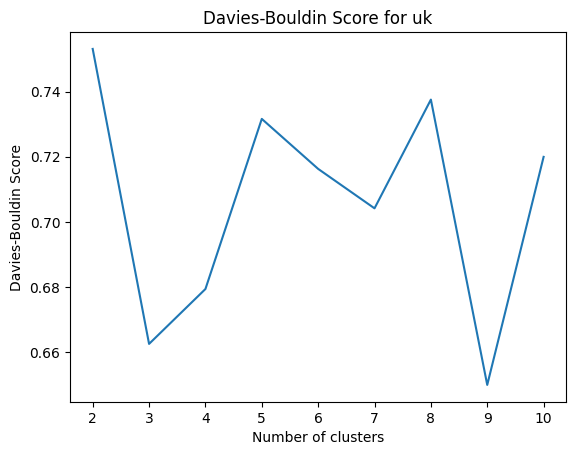

[np.float64(0.38103026121396966)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132441694366579)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132441694366579), np.float64(0.6094911882898488)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132441694366579), np.float64(0.6094911882898488), np.float64(0.5953249599118511)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132441694366579), np.float64(0.6094911882898488), np.float64(0.5953249599118511), np.float64(0.5061852960879897)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132441694366579), np.float64(0.6094911882898488), np.float64(0.5953249599118511), np.float64(0.5061852960879897), np.float64(0.5362517449786584)]
[np.float64(0.38103026121396966), np.float64(0.44605382283018985), np.float64(0.4132

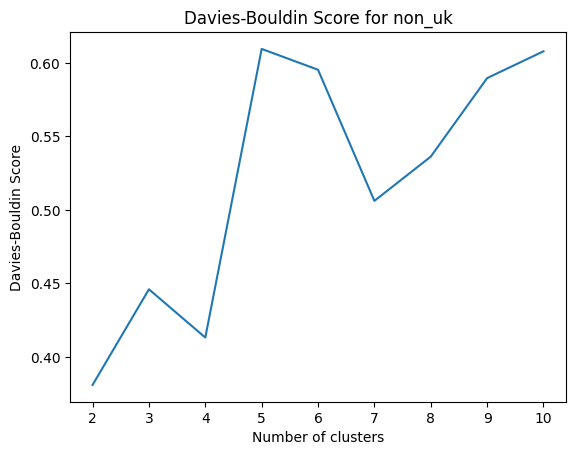

In [61]:
# Davies-Bouldin score for kmeans uk
kmeans_db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
    kmeans_db.append(davies_bouldin_score(rfm_uk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_db)
plt.plot(range(2, 11), kmeans_db)
plt.title('Davies-Bouldin Score for uk')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Davies-Bouldin score for kmeans non_uk
kmeans_db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
    kmeans_db.append(davies_bouldin_score(rfm_nonuk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_db)
plt.plot(range(2, 11), kmeans_db)
plt.title('Davies-Bouldin Score for non_uk')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()


[np.float64(1784.014363618366)]
[np.float64(1784.014363618366), np.float64(2780.62420382418)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755), np.float64(3358.662159875377)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755), np.float64(3358.662159875377), np.float64(3338.231206023608)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755), np.float64(3358.662159875377), np.float64(3338.231206023608), np.float64(3512.2330709357147)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755), np.float64(3358.662159875377), np.float64(3338.231206023608), np.float64(3512.2330709357147), np.float64(3774.3552313921937)]
[np.float64(1784.014363618366), np.float64(2780.62420382418), np.float64(3436.5734805734755), np.float64(3358.662159875377)

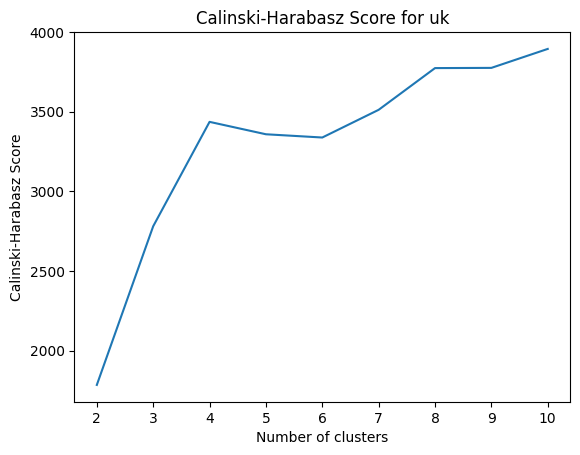

[np.float64(379.6732905485004)]
[np.float64(379.6732905485004), np.float64(631.7851456383073)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944), np.float64(756.6833131482064)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944), np.float64(756.6833131482064), np.float64(840.363604729084)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944), np.float64(756.6833131482064), np.float64(840.363604729084), np.float64(1050.9366701896834)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944), np.float64(756.6833131482064), np.float64(840.363604729084), np.float64(1050.9366701896834), np.float64(1158.2042203024012)]
[np.float64(379.6732905485004), np.float64(631.7851456383073), np.float64(726.5521157037944), np.float64(756.6833131482064), 

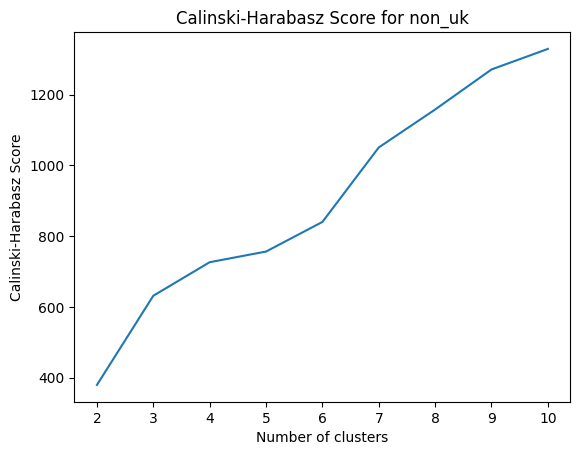

In [62]:
# Calinski-Harabasz score for kmeans uk
kmeans_ch = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])
    kmeans_ch.append(calinski_harabasz_score(rfm_uk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_ch)
plt.plot(range(2, 11), kmeans_ch)
plt.title('Calinski-Harabasz Score for uk')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

# Calinski-Harabasz score for kmeans non_uk
kmeans_ch = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])
    kmeans_ch.append(calinski_harabasz_score(rfm_nonuk[['Recency', 'Frequency', 'Monetary']], kmeans.labels_))
    print(kmeans_ch)
plt.plot(range(2, 11), kmeans_ch)
plt.title('Calinski-Harabasz Score for non_uk')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()


# BEST CLUSTERING ALGORITHM

In [63]:
# After evaluating all the algorithms Kmeans is the best algorithm in terms of insights and segmentation.

# The number of Clusters for optimal segmentation after checking the Silhouette Score,
 #Davies-Bouldin Index Score and the Calinski Harabasz Index Score is 4.

# Silhouette Score for uk and non_uk countries keeps on dropping and is high at 2. 2 clusters in terms of classification is not enough, The 2nd highest is at 4.

# Davies-Bouldin Index Score for uk is lowest at 9. The second lowest is at 3, after that it keeps increasing up to 5. Segmentation of customers into 3 clusters do not have differences, so 4 cluster is optimal.
# Davies-Bouldin Index Score for non_uk countries is lowest at 2. The second lowest is at 4, so it is optimal at 4 clusters.

# Calinski-Harabasz Index Score for uk reaches it's first peak at 4, then drops a bit and again continues to high at 8 then 10. For Business POV, it is optimal at 4.
# Calinski-Harabasz Index Score for non_uk countries keeps on increasing till 10.

# DEPLOYMENT

In [127]:
import gradio as gr
import pandas as pd
import numpy as np
import json # Import json for manifest

# Ensure the necessary variables from previous cells are available (rfm_uk, rfm_nonuk, scaler, kmeans_mapping_uk, kmeans_mapping_nonuk)

def predict_segment_unsupervised(recency, frequency, monetary, country):
    # Create a DataFrame from the inputs
    input_data = pd.DataFrame([{
        'Recency': recency,
        'Frequency': frequency,
        'Monetary': monetary,
        'Country': country
    }])

    # Determine which scaler and mapping to use based on the country
    if country == 'United Kingdom':
        # Use the UK scaler and mapping
        scaled_data = scaler.transform(input_data[['Recency', 'Frequency', 'Monetary']])
        mapping = kmeans_mapping_uk
    else:
        # Use the non-UK scaler and mapping
        scaled_data = scaler.transform(input_data[['Recency', 'Frequency', 'Monetary']])
        mapping = kmeans_mapping_nonuk

    # Predict the cluster using the appropriate kmeans model
    # We need to ensure the kmeans models are accessible, or retrain/load them here
    # For simplicity, let's assume the kmeans models are available in the global scope
    # In a real deployment, you would save and load the models

    # Assuming the kmeans models from cell 76lRQ8TVGUE9 are available
    # If not, you would need to load or recreate them here
    kmeans_uk = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_uk.fit(rfm_uk[['Recency', 'Frequency', 'Monetary']])

    kmeans_nonuk = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_nonuk.fit(rfm_nonuk[['Recency', 'Frequency', 'Monetary']])


    if country == 'United Kingdom':
        predicted_cluster = kmeans_uk.predict(scaled_data)[0]
        predicted_segment = mapping.get(predicted_cluster, 'Unknown Segment')
    else:
        predicted_cluster = kmeans_nonuk.predict(scaled_data)[0]
        predicted_segment = mapping.get(predicted_cluster, 'Unknown Segment')


    return f"Cluster: {predicted_cluster}", f"Segment: {predicted_segment}"

# Create PWA manifest (simplified example, customize as needed)
manifest = {
    "name": "Customer Segmentation (Unsupervised)",
    "short_name": "CustSegUnsup",
    "start_url": ".",
    "display": "standalone",
    "background_color": "#ffffff",
    "theme_color": "#0d6efd",
    "description": "Predict customer segments based on RFM values and country using K-Means.",
    "icons": [] # Add icons here if you have them
}
with open("manifest_unsupervised.json", "w") as f:
    json.dump(manifest, f)

# Create service worker (basic example)
with open("service-worker-unsupervised.js", "w") as f:
    f.write("""
self.addEventListener('install', function(event) {
    event.waitUntil(
        caches.open('v1-unsupervised').then(function(cache) {
            return cache.addAll([]); // Add files to cache here
        })
    );
});
self.addEventListener('fetch', function(event) {
    event.respondWith(
        caches.match(event.request).then(function(response) {
            return response || fetch(event.request);
        })
    );
});
    """)

# HTML block for PWA registration
pwa_html = """
<link rel="manifest" href="/file=manifest_unsupervised.json">
<script>
if ('serviceWorker' in navigator) {
    navigator.serviceWorker.register('/file=service-worker-unsupervised.js');
}
</script>
"""


# Build the Gradio interface
with gr.Blocks() as demo_unsupervised:
    gr.HTML("<h2>Customer Segmentation (Unsupervised)</h2>" + pwa_html)

    with gr.Row():
        recency_input = gr.Number(label="Recency")
        frequency_input = gr.Number(label="Frequency")
        monetary_input = gr.Number(label="Monetary")
        country_input = gr.Dropdown(choices=country_list, label="Country") # Assuming country_list is defined from previous cells

    with gr.Row():
        cluster_output = gr.Textbox(label="Predicted Cluster")
        segment_output = gr.Textbox(label="Predicted Segment")

    predict_btn = gr.Button("Predict")
    predict_btn.click(
        predict_segment_unsupervised,
        inputs=[recency_input, frequency_input, monetary_input, country_input],
        outputs=[cluster_output, segment_output]
    )


demo_unsupervised.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4eb7b0ddf90fdd7d65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# SUPERVISED LEARNING-PREDICTION

In [65]:
rfm_uk.info()
rfm_nonuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3920 non-null   float64
 1   Recency           3920 non-null   float64
 2   Frequency         3920 non-null   float64
 3   Monetary          3920 non-null   float64
 4   Cluster           3920 non-null   int32  
 5   Customer_Segment  3920 non-null   object 
 6   Segment_KMeans    3920 non-null   object 
dtypes: float64(4), int32(1), object(2)
memory usage: 199.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        418 non-null    float64
 1   Recency           418 non-null    float64
 2   Frequency         418 non-null    float64
 3   Monetary          418 non-null    float64
 4   Cluster         

# PREDICTING THE CUSTOMER SEGMENTS

In [66]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryGroup
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Non-UK
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Non-UK
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Non-UK


# ADDING THE 'COUNTRY' COLUMN TO RFM

In [67]:
# Adding the country column to rfm table to know what country it is in the countrygroup.
rfm_uk['Country'] = 'United Kingdom'
rfm_nonuk = rfm_nonuk.merge(df[['CustomerID', 'Country']].dropna(subset='CustomerID').drop_duplicates(), on='CustomerID', how='left')

# COMBINING BOTH SEGMENTS

In [68]:
# Before encoding drop the customer_segment table
rfm_uk = rfm_uk.drop(columns=['Customer_Segment'])
rfm_nonuk = rfm_nonuk.drop(columns=['Customer_Segment']) # This column is static and manually assigned so it could cause confusion.

In [69]:
rfm_uk['Country'].isnull().sum()
rfm_nonuk['Country'].isnull().sum()

np.int64(0)

In [70]:
rfm_uk.info()
rfm_nonuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3920 non-null   float64
 1   Recency         3920 non-null   float64
 2   Frequency       3920 non-null   float64
 3   Monetary        3920 non-null   float64
 4   Cluster         3920 non-null   int32  
 5   Segment_KMeans  3920 non-null   object 
 6   Country         3920 non-null   object 
dtypes: float64(4), int32(1), object(2)
memory usage: 199.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      426 non-null    float64
 1   Recency         426 non-null    float64
 2   Frequency       426 non-null    float64
 3   Monetary        426 non-null    float64
 4   Cluster         426 non-null    int32  
 5   S

In [71]:
# Combining rfm_uk and rfm_non_uk to build a single prediction model
combined_rfm = pd.concat([rfm_uk, rfm_nonuk], ignore_index=True)

In [72]:
combined_rfm['Segment_KMeans'].value_counts()

,count
Segment_KMeans,
New or One-time Shoppers,2975
Churning Customers,1066
Potential Loyalists,285
Loyal High Spenders,20


# LABELING BASED ON Z-SCORE

In [73]:
numerical_cols = ['Recency', 'Frequency', 'Monetary']
zscore_df = combined_rfm[numerical_cols].apply(zscore)
print(zscore_df.head())

    Recency  Frequency  Monetary
0  2.351543  -0.451638 -0.468241
1 -0.906221   0.938678  0.952943
2 -0.916276  28.466951  9.469798
3 -0.886112   0.104488  0.910401
4 -0.896166  -0.034543 -0.126789


In [74]:
# Computing z-scores for the combined RFM data
numerical_cols = ['Recency', 'Frequency', 'Monetary']
combined_rfm[['z_Recency', 'z_Frequency', 'z_Monetary']] = combined_rfm[numerical_cols].apply(zscore)

# Defining labels based on z-score on combined rfm
def assign_segment(row):
    if row['z_Recency'] < -0.9 and row['z_Frequency'] > 12 and row['z_Monetary'] > 9:
        return 'Loyal High Spenders'
    elif row['z_Recency'] < -0.5 and row['z_Frequency'] > 0.8 and row['z_Monetary'] > 0.8:
        return 'Potential Loyalists'
    elif row['z_Recency'] > 1.5:
        return 'Churning Customers'
    else:
        return 'New or One-time Shoppers'

# Assigning the new segment label
combined_rfm['Segment_Final'] = combined_rfm.apply(assign_segment, axis=1)



In [75]:
print(combined_rfm['Segment_Final'].value_counts())

Segment_Final
New or One-time Shoppers    3583
Churning Customers           541
Potential Loyalists          218
Loyal High Spenders            4
Name: count, dtype: int64


In [76]:
combined_rfm['Segment_Final'].value_counts(normalize=True)

,proportion
Segment_Final,
New or One-time Shoppers,0.824436
Churning Customers,0.124482
Potential Loyalists,0.050161
Loyal High Spenders,0.000920


In [77]:
print("Distribution of 'Potential Loyalists' segment:")
print(combined_rfm[combined_rfm['Segment_Final'] == 'Potential Loyalists'].shape[0])

Distribution of 'Potential Loyalists' segment:
218


In [78]:
# Save only needed columns
export_df = combined_rfm[[
    'CustomerID', 'Recency', 'Frequency', 'Monetary',
    'Country', 'Segment_Final'  # or Segment_KMeans if you prefer
]]

# Optional: convert label numbers to readable text if needed
#export_df['Segment_KMeans'] = export_df['Segment_KMeans'].map(kmeans_mapping_uk)

# Save to CSV
export_df.to_csv("customer_segments_for_powerbi.csv", index=False)


# ENCODING

In [79]:
# Label encoding on combined_rfm
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_rfm['Segment_Final'])

In [80]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [81]:
combined_rfm['Segment_Final'].value_counts()

,count
Segment_Final,
New or One-time Shoppers,3583
Churning Customers,541
Potential Loyalists,218
Loyal High Spenders,4


In [82]:
# One-hot encoding for country
combined_rfm = pd.get_dummies(combined_rfm, columns=['Country'], drop_first=True)

In [83]:
# Save feature columns for consistent prediction later
'''feature_columns = combined_rfm.columns
joblib.dump(feature_columns, 'feature_columns.pkl')'''

"feature_columns = combined_rfm.columns\njoblib.dump(feature_columns, 'feature_columns.pkl')"

In [84]:
combined_rfm['Country_Switzerland'].value_counts()

,count
Country_Switzerland,
False,4325
True,21


In [85]:
print(combined_rfm.dtypes)

CustomerID                      float64
Recency                         float64
Frequency                       float64
Monetary                        float64
Cluster                           int32
Segment_KMeans                   object
z_Recency                       float64
z_Frequency                     float64
z_Monetary                      float64
Segment_Final                    object
Country_Austria                    bool
Country_Bahrain                    bool
Country_Belgium                    bool
Country_Brazil                     bool
Country_Canada                     bool
Country_Channel Islands            bool
Country_Cyprus                     bool
Country_Czech Republic             bool
Country_Denmark                    bool
Country_EIRE                       bool
Country_European Community         bool
Country_Finland                    bool
Country_France                     bool
Country_Germany                    bool
Country_Greece                     bool


# TRAIN_TEST_SPLIT

In [86]:
# Droping unnecessary columns
X = combined_rfm.drop(columns=['CustomerID', 'Segment_KMeans', 'Segment_Final', 'Cluster'], errors='ignore')

# Save the column names (for the Gradio interface)
joblib.dump(X.columns.tolist(), 'X_columns.pkl')

['X_columns.pkl']

In [87]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
feature_columns = X_train.columns.tolist()

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3476, 42), (870, 42), (3476,), (870,))

In [90]:
y_train = pd.Series(y_train)
y_train.value_counts(normalize=True) * 100   # checking the percentage of class imbalance

,proportion
2,82.451093
0,12.456847
3,5.005754
1,0.086306


In [91]:
# We see the 2-Dimensional visualizations for the combined_rfm data using Dimensionality Reduction techniques PCA and t-SNE.
# There are 4 clusters, they have class imbalance only and not correlated, we can apply SMOTE.
# If the classes are not distinct, we cannot differentiate between classes, then we need to apply SMOTE-TOMEK.

In [92]:
# Dilemma 1: By checking the internal metrics, I came to know that 5 clusters are good for business insights, but in terms of silhouette, db and ch scores, the data quality becomes low. so I turned the no of clusters from 5 to 4 and the score was considerably increasing.
# Dilemma 2: There is a class imbalance and the minority class is so low, the data is very less for the minority class. Besides treating it, if we reduce the clusters from 4 to 3, then there are some improvements in class imbalance.

# PCA FOR SMOTE/SMOTE-TOMEK CHECKING

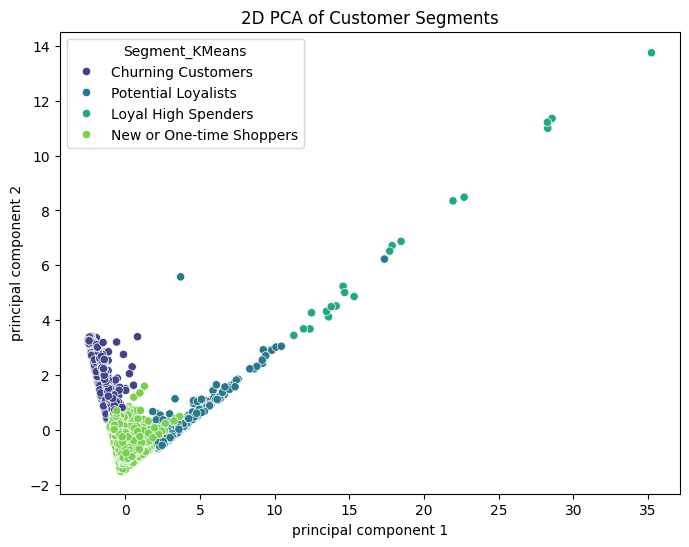

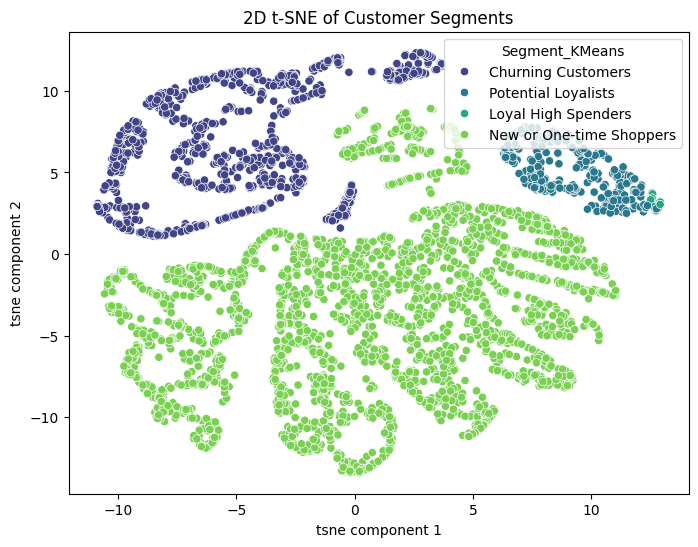

In [93]:
# PCA for combined_rfm
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_rfm.drop(columns=['CustomerID', 'Segment_KMeans', 'Segment_Final'])) # Drop 'Segment_Final' as well
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['Segment_KMeans'] = combined_rfm['Segment_KMeans'] # Add Segment_KMeans back for visualization

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Segment_KMeans', data=pca_df, palette='viridis')
plt.title('2D PCA of Customer Segments')
plt.show()

# t-SNE for combined_rfm
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_rfm.drop(columns=['CustomerID', 'Segment_KMeans', 'Segment_Final'])) # Drop 'Segment_Final' as well
tsne_df = pd.DataFrame(data = tsne_results, columns = ['tsne component 1', 'tsne component 2'])
tsne_df['Segment_KMeans'] = combined_rfm['Segment_KMeans'] # Add Segment_KMeans back for visualization

# Visualize t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Segment_KMeans', data=tsne_df, palette='viridis')
plt.title('2D t-SNE of Customer Segments')
plt.show()

# TREATING CLASS IMBALANCE USING SMOTE

In [94]:
# Applying smote for class imbalance
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = pd.Series(y_train_resampled) # Convert to pandas Series
y_train_resampled.value_counts()

,count
0,2866
2,2866
3,2866
1,2866


In [95]:
# Applying smote for class imbalance
'''
from imblearn.over_sampling import SMOTE
resampler = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=2))
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
y_train_resampled = pd.Series(y_train_resampled) # Convert to pandas Series
y_train_resampled.value_counts()'''

'\nfrom imblearn.over_sampling import SMOTE\nresampler = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=2))\nX_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)\ny_train_resampled = pd.Series(y_train_resampled) # Convert to pandas Series\ny_train_resampled.value_counts()'

# MODEL TRAINING

In [96]:
# Training on multiple models to check the best performed model

In [97]:
# Logistic Regression model
'''
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
'''

'\nlr_model = LogisticRegression()\nlr_model.fit(X_train_resampled, y_train_resampled)\n'

In [98]:
#y_pred_lr = lr_model.predict(X_test)

In [99]:
# Metrics to check
'''
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression F1 Score (macro):", f1_score(y_test, y_pred_lr, average='macro'))
print("Logistic Regression MCC Score:", matthews_corrcoef(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))'''

'\nprint("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))\nprint("Logistic Regression Precision:", precision_score(y_test, y_pred_lr, average=\'weighted\'))\nprint("Logistic Regression Recall:", recall_score(y_test, y_pred_lr, average=\'weighted\'))\nprint("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average=\'weighted\'))\nprint("Logistic Regression F1 Score (macro):", f1_score(y_test, y_pred_lr, average=\'macro\'))\nprint("Logistic Regression MCC Score:", matthews_corrcoef(y_test, y_pred_lr))\nprint("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))\nprint("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))'

In [100]:
# Random Forest Classifier model
'''
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)'''

'\nrf_model = RandomForestClassifier()\nrf_model.fit(X_train_resampled, y_train_resampled)'

In [101]:
#y_pred_rf = rf_model.predict(X_test)

In [102]:
# Metrics to check
'''
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest F1 Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
print("Random Forest MCC Score:", matthews_corrcoef(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))'''

'\nprint("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))\nprint("Random Forest Precision:", precision_score(y_test, y_pred_rf, average=\'weighted\'))\nprint("Random Forest Recall:", recall_score(y_test, y_pred_rf, average=\'weighted\'))\nprint("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average=\'weighted\'))\nprint("Random Forest F1 Score (macro):", f1_score(y_test, y_pred_rf, average=\'macro\'))\nprint("Random Forest MCC Score:", matthews_corrcoef(y_test, y_pred_rf))\nprint("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))\nprint("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))'

In [103]:
# Support Vector Classifier
'''
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)'''

'\nsvc_model = SVC()\nsvc_model.fit(X_train_resampled, y_train_resampled)'

In [104]:
#y_pred_svc = svc_model.predict(X_test)

In [105]:
# Metrics to check
'''
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Precision:", precision_score(y_test, y_pred_svc, average='weighted'))
print("SVC Recall:", recall_score(y_test, y_pred_svc, average='weighted'))
print("SVC F1 Score:", f1_score(y_test, y_pred_svc, average='weighted'))
print("SVC F1 Score (macro):", f1_score(y_test, y_pred_svc, average='macro'))
print("SVC MCC Score:", matthews_corrcoef(y_test, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))'''

'\nprint("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))\nprint("SVC Precision:", precision_score(y_test, y_pred_svc, average=\'weighted\'))\nprint("SVC Recall:", recall_score(y_test, y_pred_svc, average=\'weighted\'))\nprint("SVC F1 Score:", f1_score(y_test, y_pred_svc, average=\'weighted\'))\nprint("SVC F1 Score (macro):", f1_score(y_test, y_pred_svc, average=\'macro\'))\nprint("SVC MCC Score:", matthews_corrcoef(y_test, y_pred_svc))\nprint("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))\nprint("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))'

In [106]:
# KNeighbours model
'''
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_resampled, y_train_resampled)'''

'\nknn_model = KNeighborsClassifier(n_neighbors=3)\nknn_model.fit(X_train_resampled, y_train_resampled)'

In [107]:
#y_pred_knn = knn_model.predict(X_test)

In [108]:
# Metrics to check
'''
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score (macro):", f1_score(y_test, y_pred_knn, average='macro'))
print("KNN MCC Score:", matthews_corrcoef(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))'''

'\nprint("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))\nprint("KNN Precision:", precision_score(y_test, y_pred_knn, average=\'weighted\'))\nprint("KNN Recall:", recall_score(y_test, y_pred_knn, average=\'weighted\'))\nprint("KNN F1 Score:", f1_score(y_test, y_pred_knn, average=\'weighted\'))\nprint("KNN F1 Score (macro):", f1_score(y_test, y_pred_knn, average=\'macro\'))\nprint("KNN MCC Score:", matthews_corrcoef(y_test, y_pred_knn))\nprint("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))\nprint("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))'

In [109]:
# XGBoost model

xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:
y_pred_xgb = xgb_model.predict(X_test)

In [111]:
# Metrics to check

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("XGBoost F1 Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))
print("XGBoost MCC Score:", matthews_corrcoef(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9954022988505747
XGBoost Precision: 0.9959754061516728
XGBoost Recall: 0.9954022988505747
XGBoost F1 Score: 0.995592666565066
XGBoost F1 Score (macro): 0.9047796527733722
XGBoost MCC Score: 0.9848737410358921
XGBoost Confusion Matrix:
 [[108   0   0   0]
 [  0   1   0   0]
 [  0   0 715   2]
 [  0   1   1  42]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00       717
           3       0.95      0.95      0.95        44

    accuracy                           1.00       870
   macro avg       0.86      0.99      0.90       870
weighted avg       1.00      1.00      1.00       870



In [112]:
# XGBoost model performs well than other models.

# EXPLAINABILITY

In [113]:
# Explaining how the model works using eli5_permutation importance
perm = PermutationImportance(xgb_model, random_state=42).fit(X_test, y_test)
weighted_df = pd.DataFrame({'feature': X_test.columns, 'importance': perm.feature_importances_,'std':perm.feature_importances_std_})
weighted_df = weighted_df.sort_values(by='importance', ascending=False)
weighted_df.head(10)

,feature,importance,std
0,Recency,0.232414,0.004201
1,Frequency,0.046667,0.002367
2,Monetary,0.044598,0.002107
3,z_Recency,0.000000,0.000000
4,z_Frequency,0.000000,0.000000
5,z_Monetary,0.000000,0.000000
6,Country_Austria,0.000000,0.000000
7,Country_Bahrain,0.000000,0.000000
8,Country_Belgium,0.000000,0.000000
9,Country_Brazil,0.000000,0.000000


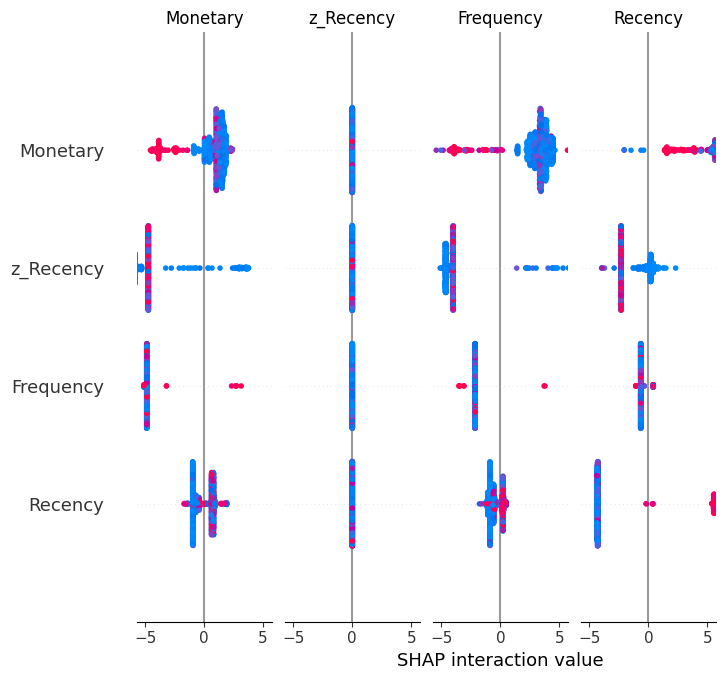

SHAP values saved to  shap_summary_plot.npy


<Figure size 640x480 with 0 Axes>

In [114]:
# Explaining how the model works using shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig('shap_summary_plot.png')
filename = " shap_summary_plot.npy"
np.save(filename, shap_values)
print(f"SHAP values saved to {filename}")

In [115]:
shap_values = np.load(' shap_summary_plot.npy', allow_pickle=True)

# CROSS-VALIDATION

In [116]:
# Cross-Validation on Unbalanced dataset for checking if it is overfitted.

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='f1_macro')
print("CV F1 Macro Scores:", scores)
print("Average F1 Macro:", scores.mean())

CV F1 Macro Scores: [0.90638032 0.9137931  0.99701631 0.99244255 0.73949176]
Average F1 Macro: 0.9098248078252358


In [117]:
# Cross-Validation with SMOTE on training data
'''
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBClassifier()
f1_scores = []
mcc_scores = []
y = pd.Series(y) # Convert y to a pandas Series
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE(random_state=42, k_neighbors=1)   # Applying SMOTE only on the training data.
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    y_pred = xgb_model.predict(X_test)'''

'\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\nxgb_model = XGBClassifier()\nf1_scores = []\nmcc_scores = []\ny = pd.Series(y) # Convert y to a pandas Series\nfor train_index, test_index in cv.split(X, y):\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n    smote = SMOTE(random_state=42, k_neighbors=1)   # Applying SMOTE only on the training data.\n    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n    xgb_model.fit(X_train_resampled, y_train_resampled)\n    y_pred = xgb_model.predict(X_test)'

In [118]:
# Metrics to check
'''
f1 = f1_score(y_test, y_pred, average='macro')
mcc = matthews_corrcoef(y_test, y_pred)
f1_scores.append(f1)
mcc_scores.append(mcc)

print("CV F1 Macro Scores:", f1_scores)
print("Average F1 Macro:", np.mean(f1_scores), "±", np.std(f1_scores))
print("\nCV MCC Scores:", mcc_scores)
print("Average MCC:", np.mean(mcc_scores), "±", np.std(mcc_scores))'''

'\nf1 = f1_score(y_test, y_pred, average=\'macro\')\nmcc = matthews_corrcoef(y_test, y_pred)\nf1_scores.append(f1)\nmcc_scores.append(mcc)\n\nprint("CV F1 Macro Scores:", f1_scores)\nprint("Average F1 Macro:", np.mean(f1_scores), "±", np.std(f1_scores))\nprint("\nCV MCC Scores:", mcc_scores)\nprint("Average MCC:", np.mean(mcc_scores), "±", np.std(mcc_scores))'

In [119]:
# Applying SMOTE to entire dataset
'''smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the entire resampled dataset
scaler = StandardScaler()
scaler.fit(X) # Fit on original full dataset
X_resampled_scaled = scaler.transform(X_resampled)


# Training final KNN model on entire resampled dataset
final_xgb_model = XGBClassifier()
final_xgb_model.fit(X_resampled_scaled, y_resampled) # Train on scaled resampled data

print("Final XGB model trained on the entire dataset.")'''

'smote = SMOTE(random_state=42, k_neighbors=2)\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Scale the entire resampled dataset\nscaler = StandardScaler()\nscaler.fit(X) # Fit on original full dataset\nX_resampled_scaled = scaler.transform(X_resampled)\n\n\n# Training final KNN model on entire resampled dataset\nfinal_xgb_model = XGBClassifier()\nfinal_xgb_model.fit(X_resampled_scaled, y_resampled) # Train on scaled resampled data\n\nprint("Final XGB model trained on the entire dataset.")'

In [120]:
# Applying SMOTETomek to entire dataset
'''
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
resampler = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=2))
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Training final XGBoost model on entire resampled dataset
final_xgb_model = XGBClassifier()
final_xgb_model.fit(X_resampled, y_resampled)

print("Final XGB model trained on the entire dataset.")'''

'\nfrom imblearn.combine import SMOTETomek\nfrom imblearn.over_sampling import SMOTE\nresampler = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=2))\nX_resampled, y_resampled = resampler.fit_resample(X, y)\n\n# Training final XGBoost model on entire resampled dataset\nfinal_xgb_model = XGBClassifier()\nfinal_xgb_model.fit(X_resampled, y_resampled)\n\nprint("Final XGB model trained on the entire dataset.")'

# HYPERPARAMETER TUNING

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10),
}

# Initialize RandomizedSearchCV
# Using a smaller number of iterations (n_iter) for demonstration purposes
# You can increase n_iter for a more thorough search
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15, # Number of parameter settings that are sampled
    scoring='f1_macro', # Use f1_macro as the scoring metric
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), # Use StratifiedKFold for cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Scale the resampled training data
# Fit the scaler on the resampled training data to ensure matching columns
scaler.fit(X_train_resampled)
X_train_resampled_scaled = scaler.transform(X_train_resampled)


# Fit RandomizedSearchCV to the resampled training data
random_search.fit(X_train_resampled_scaled, y_train_resampled) # Use scaled resampled training data

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 Macro score found: ", random_search.best_score_)

# Get the best model
best_xgb_model = random_search.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters found:  {'colsample_bytree': np.float64(0.908897907718663), 'gamma': np.float64(0.0993578407670862), 'learning_rate': np.float64(0.01165663513708072), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 692, 'subsample': np.float64(0.88453678109946)}
Best F1 Macro score found:  0.9988657050338343


# SAVE THE MODEL

In [122]:
# Save the StandardScaler

joblib.dump(scaler, 'scaler.pkl')
scaler.fit(X_train) # Fit on original X_train BEFORE resampling

StandardScaler()

In [123]:
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [124]:
print("Label mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")

Label mapping:
0 → Churning Customers
1 → Loyal High Spenders
2 → New or One-time Shoppers
3 → Potential Loyalists


# DEPLOYMENT

In [125]:
import gradio as gr
import json
import pandas as pd

# Class descriptions for your 4 customer types
class_descriptions = {
    0: "These customers haven't purchased recently and are at risk of leaving.",
    1: "These customers have purchased only once or recently joined.",
    2: "These customers show promising purchase patterns and could become loyal buyers.",
    3: "These customers purchase frequently and spend significantly."
}

# Prediction function
def predict_customer_class(recency, frequency, monetary, country):
    # Create DataFrame for single prediction
    input_data = pd.DataFrame({
        'Recency': [recency],
        'Frequency': [frequency],
        'Monetary': [monetary],
        'Country': [country]
    })

    # One-hot encode Country (same as training)
    input_data = pd.get_dummies(input_data, columns=['Country'])

    # Ensure same columns as training
    input_data = input_data.reindex(columns=feature_columns, fill_value=0)

    # Predict
    pred_class = best_xgb_model.predict(input_data)[0]

    # Get description
    description = class_descriptions.get(pred_class, "No description available.")

    return pred_class, description


# Create PWA manifest
manifest = {
    "name": "Customer Segmentation & Prediction",
    "short_name": "CustPredict",
    "start_url": ".",
    "display": "standalone",
    "background_color": "#ffffff",
    "theme_color": "#0d6efd",
    "description": "Predict customer types based on RFM values and country.",
    "icons": []
}
with open("manifest.json", "w") as f:
    json.dump(manifest, f)

# Create service worker
with open("service-worker.js", "w") as f:
    f.write("""
self.addEventListener('install', function(event) {
    event.waitUntil(
        caches.open('v1').then(function(cache) {
            return cache.addAll([]);
        })
    );
});
self.addEventListener('fetch', function(event) {
    event.respondWith(
        caches.match(event.request).then(function(response) {
            return response || fetch(event.request);
        })
    );
});
    """)

# HTML block for PWA registration
pwa_html = """
<link rel="manifest" href="manifest.json">
<script>
if ('serviceWorker' in navigator) {
    navigator.serviceWorker.register('service-worker.js');
}
</script>
"""

# Build Gradio interface
with gr.Blocks() as demo:
    gr.HTML("<h2>Customer Segmentation & Prediction</h2>" + pwa_html)

    with gr.Row():
        recency_input = gr.Number(label="Recency (days since last purchase)")
        frequency_input = gr.Number(label="Frequency (number of purchases)")
        monetary_input = gr.Number(label="Monetary (total spend)")
        country_input = gr.Dropdown(choices=country_list, label="Country")

    with gr.Row():
        class_output = gr.Textbox(label="Predicted Class")
        description_output = gr.Textbox(label="Description")

    predict_btn = gr.Button("Predict")
    predict_btn.click(
        predict_customer_class,
        inputs=[recency_input, frequency_input, monetary_input, country_input],
        outputs=[class_output, description_output]
    )

demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://273462514c4601d457.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e9a6cc484168f4a28d.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://273462514c4601d457.gradio.live
